In [1]:
# Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import mplfinance as mpf

In [2]:
# Loading the data set:
df = pd.read_csv(r'C:\Users\ivand\Desktop\nvda_180_days_minute_data_(RAW).csv')

In [3]:
# Changing the volume column to integer:
df['volume'] = df['volume'].astype('int64')

In [4]:
# Checking data:
df.head(5)

,symbol,timestamp,open,high,low,close,volume
0,NVDA,2024-11-13 09:00:00,148.65,148.95,148.00,148.50,14930
1,NVDA,2024-11-13 09:01:00,148.47,148.57,148.40,148.53,7825
2,NVDA,2024-11-13 09:02:00,148.55,148.56,148.41,148.48,11155
3,NVDA,2024-11-13 09:03:00,148.49,148.49,148.25,148.27,15815
4,NVDA,2024-11-13 09:04:00,148.23,148.26,148.10,148.15,12117


In [5]:
# Checking data:
df.shape

(115234, 7)

In [6]:
# Checking data:
df.dtypes

symbol        object
timestamp     object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object

In [7]:
# Fixing the format for the timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
# Checking data:
df.dtypes

symbol               object
timestamp    datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
dtype: object

In [9]:
# Checking data:
df.isna().sum()

symbol       0
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [10]:
# Checking data:
df.duplicated().sum()

np.int64(0)

In [11]:
# Removing the symbol column
df = df.drop ('symbol', axis=1)

In [12]:
# Checking data:
df.head()

,timestamp,open,high,low,close,volume
0,2024-11-13 09:00:00,148.65,148.95,148.00,148.50,14930
1,2024-11-13 09:01:00,148.47,148.57,148.40,148.53,7825
2,2024-11-13 09:02:00,148.55,148.56,148.41,148.48,11155
3,2024-11-13 09:03:00,148.49,148.49,148.25,148.27,15815
4,2024-11-13 09:04:00,148.23,148.26,148.10,148.15,12117


In [13]:
# Checking data:
df.tail()

,timestamp,open,high,low,close,volume
115229,2025-05-09 23:55:00,116.3900,116.4000,116.3700,116.3900,16478
115230,2025-05-09 23:56:00,116.3900,116.3998,116.3800,116.3800,8977
115231,2025-05-09 23:57:00,116.3913,116.3913,116.3800,116.3900,1707
115232,2025-05-09 23:58:00,116.3802,116.3802,116.3400,116.3800,11037
115233,2025-05-09 23:59:00,116.3700,116.3900,116.3507,116.3898,6510


In [14]:
# Round all price columns to 2 decimal places:
df['open'] = df['open'].round(2)
df['high'] = df['high'].round(2)
df['low'] = df['low'].round(2)
df['close'] = df['close'].round(2)

# Verify the changes:
df.tail()

,timestamp,open,high,low,close,volume
115229,2025-05-09 23:55:00,116.39,116.40,116.37,116.39,16478
115230,2025-05-09 23:56:00,116.39,116.40,116.38,116.38,8977
115231,2025-05-09 23:57:00,116.39,116.39,116.38,116.39,1707
115232,2025-05-09 23:58:00,116.38,116.38,116.34,116.38,11037
115233,2025-05-09 23:59:00,116.37,116.39,116.35,116.39,6510


In [15]:
# Checking data:
df.shape

(115234, 6)

In [16]:
# Checking data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115234 entries, 0 to 115233
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  115234 non-null  datetime64[ns]
 1   open       115234 non-null  float64       
 2   high       115234 non-null  float64       
 3   low        115234 non-null  float64       
 4   close      115234 non-null  float64       
 5   volume     115234 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 5.3 MB


In [17]:
# Removing data for Saturdays, as then the market is closed:
df = df[df['timestamp'].dt.dayofweek != 5]

In [18]:
# Checking if removed
df.shape

(114276, 6)

In [19]:
# Checking data:
df.head()

,timestamp,open,high,low,close,volume
0,2024-11-13 09:00:00,148.65,148.95,148.00,148.50,14930
1,2024-11-13 09:01:00,148.47,148.57,148.40,148.53,7825
2,2024-11-13 09:02:00,148.55,148.56,148.41,148.48,11155
3,2024-11-13 09:03:00,148.49,148.49,148.25,148.27,15815
4,2024-11-13 09:04:00,148.23,148.26,148.10,148.15,12117


In [20]:
# Creating a Logarithmic return of the "close" prices column:
df['Log_Return'] = np.log(df['close'] / df['close'].shift(1))

In [21]:
# Checking data:
df.head()

,timestamp,open,high,low,close,volume,Log_Return
0,2024-11-13 09:00:00,148.65,148.95,148.00,148.50,14930,NaN
1,2024-11-13 09:01:00,148.47,148.57,148.40,148.53,7825,0.000202
2,2024-11-13 09:02:00,148.55,148.56,148.41,148.48,11155,-0.000337
3,2024-11-13 09:03:00,148.49,148.49,148.25,148.27,15815,-0.001415
4,2024-11-13 09:04:00,148.23,148.26,148.10,148.15,12117,-0.000810


In [22]:
# Creating a "Year_Month" column for further analysis:
df['Year_Month'] = df['timestamp'].dt.to_period('M')

In [23]:
# Checking data:
df.head()

,timestamp,open,high,low,close,volume,Log_Return,Year_Month
0,2024-11-13 09:00:00,148.65,148.95,148.00,148.50,14930,NaN,2024-11
1,2024-11-13 09:01:00,148.47,148.57,148.40,148.53,7825,0.000202,2024-11
2,2024-11-13 09:02:00,148.55,148.56,148.41,148.48,11155,-0.000337,2024-11
3,2024-11-13 09:03:00,148.49,148.49,148.25,148.27,15815,-0.001415,2024-11
4,2024-11-13 09:04:00,148.23,148.26,148.10,148.15,12117,-0.000810,2024-11


In [24]:
# Exporting data:
df.to_csv('NVDA_original_dataset.csv', index=False)

In [25]:
# Calculating the Monthly average close price:
monthly_avg_close = df.groupby('Year_Month')['close'].mean().reset_index()
monthly_avg_close.rename(columns={'close': 'Avg_Close'}, inplace=True)

In [26]:
# Calculating the Monthly volatility:
monthly_volatility_df = df.groupby('Year_Month')['Log_Return'].std().reset_index()
monthly_volatility_df.rename(columns={'Log_Return': 'Volatility'}, inplace=True)

In [27]:
# Merging the two newly created data sets in one:
monthly_summary = pd.merge(monthly_avg_close, monthly_volatility_df, on='Year_Month')
monthly_summary['Year_Month'] = monthly_summary['Year_Month'].astype(str)

In [28]:
# Checking data:
monthly_summary.head()

,Year_Month,Avg_Close,Volatility
0,2024-11,142.107767,0.001107
1,2024-12,137.291938,0.000831
2,2025-01,135.912638,0.001464
3,2025-02,130.494113,0.001318
4,2025-03,115.198399,0.001179


In [29]:
# Exporting data:
monthly_summary.to_csv('monthly_avg_close_price_vs_volatility.csv', index=False)

In [30]:
# Formatting the currency to be (B-billions; M-millions; K-thousands):
def currency_formatter(x, pos):
    if x >= 1_000_000_000:
        return f'${x*1e-9:.1f}B' # e.g., $1.2B
    elif x >= 1_000_000:
        return f'${x*1e-6:.1f}M' # e.g., $150.1M
    elif x >= 1_000:
        return f'${x*1e-3:.0f}K' # e.g., $150K (no decimals for thousands, adjust as needed)
    return f'${x:.0f}' # For numbers less than 1000, show as whole dollars

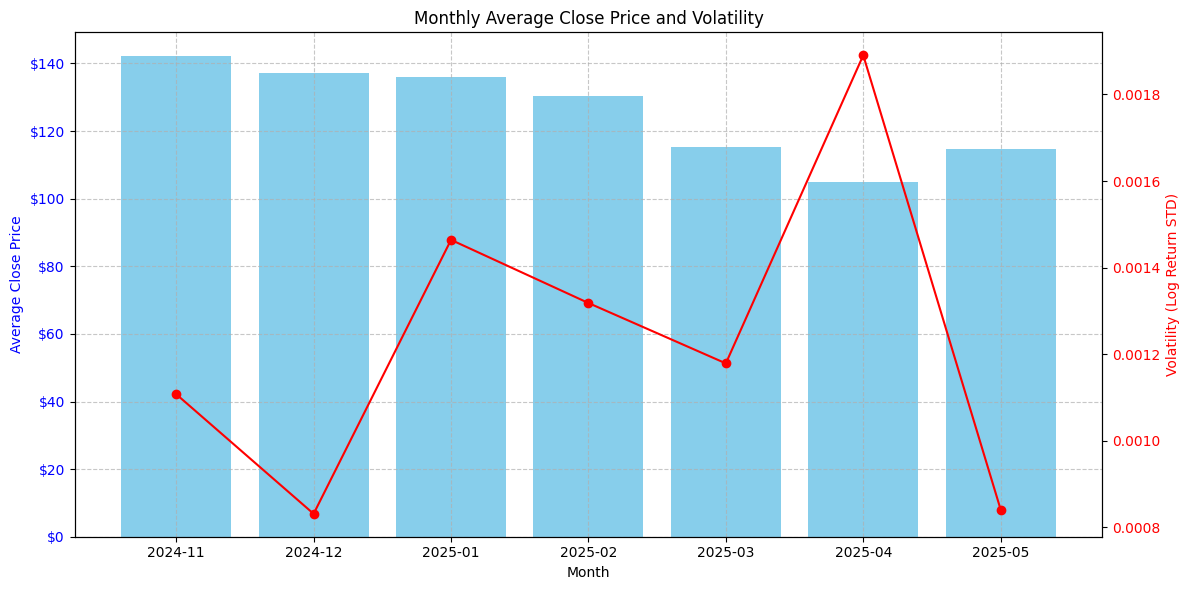

In [31]:
# Creating the visualisation:
fig, ax1 = plt.subplots(figsize=(12, 6))
# Bar plot: average close prices
ax1.bar(monthly_summary['Year_Month'], monthly_summary['Avg_Close'], color='skyblue', label='Average Close Price')
ax1.set_ylabel('Average Close Price', color='blue')
ax1.set_xlabel('Month')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))
ax1.grid(True, linestyle='--', alpha=0.7, zorder=1)

# Secondary y-axis: volatility line
ax2 = ax1.twinx()
ax2.plot(monthly_summary['Year_Month'], monthly_summary['Volatility'], color='red', marker='o', label='Volatility')
ax2.set_ylabel('Volatility (Log Return STD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)

# Title and legend
plt.title('Monthly Average Close Price and Volatility')
fig.tight_layout()
plt.savefig('monthly_average_close_prices_vs_volatility.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# Creating a "Weekday_Name" column:
df['Weekday_Name'] = df['timestamp'].dt.day_name()

In [33]:
# Checking data:
df.head()

,timestamp,open,high,low,close,volume,Log_Return,Year_Month,Weekday_Name
0,2024-11-13 09:00:00,148.65,148.95,148.00,148.50,14930,NaN,2024-11,Wednesday
1,2024-11-13 09:01:00,148.47,148.57,148.40,148.53,7825,0.000202,2024-11,Wednesday
2,2024-11-13 09:02:00,148.55,148.56,148.41,148.48,11155,-0.000337,2024-11,Wednesday
3,2024-11-13 09:03:00,148.49,148.49,148.25,148.27,15815,-0.001415,2024-11,Wednesday
4,2024-11-13 09:04:00,148.23,148.26,148.10,148.15,12117,-0.000810,2024-11,Wednesday


In [34]:
# Checking data:
df.tail()

,timestamp,open,high,low,close,volume,Log_Return,Year_Month,Weekday_Name
115229,2025-05-09 23:55:00,116.39,116.40,116.37,116.39,16478,-0.000086,2025-05,Friday
115230,2025-05-09 23:56:00,116.39,116.40,116.38,116.38,8977,-0.000086,2025-05,Friday
115231,2025-05-09 23:57:00,116.39,116.39,116.38,116.39,1707,0.000086,2025-05,Friday
115232,2025-05-09 23:58:00,116.38,116.38,116.34,116.38,11037,-0.000086,2025-05,Friday
115233,2025-05-09 23:59:00,116.37,116.39,116.35,116.39,6510,0.000086,2025-05,Friday


In [35]:
# Creating a 'Date' column from the timestamp for daily grouping:
df['Date'] = df['timestamp'].dt.date

# Calculating Daily High and Low for each unique date
daily_summary_for_diff = df.groupby('Date').agg(
    Daily_High=('high', 'max'),
    Daily_Low=('low', 'min')
).reset_index()

# Calculating the daily high-low difference
daily_summary_for_diff['Daily_High_Low_Diff'] = daily_summary_for_diff['Daily_High'] - daily_summary_for_diff['Daily_Low']

# Merging the daily differences with the Weekday_Name from the original df
daily_summary_for_diff = pd.merge(
    daily_summary_for_diff,
    df[['Date', 'Weekday_Name']].drop_duplicates(subset=['Date']),
    on='Date'
)

# Finally, calculating the average of these daily differences for each weekday
average_high_low_diff_by_weekday = daily_summary_for_diff.groupby('Weekday_Name')['Daily_High_Low_Diff'].mean().reset_index()

# Renaming the column for clarity
average_high_low_diff_by_weekday.rename(
    columns={'Daily_High_Low_Diff': 'Avg_Daily_High_Low_Diff'},
    inplace=True
)

In [36]:
# Checking data:
df.head()

,timestamp,open,high,low,close,volume,Log_Return,Year_Month,Weekday_Name,Date
0,2024-11-13 09:00:00,148.65,148.95,148.00,148.50,14930,NaN,2024-11,Wednesday,2024-11-13
1,2024-11-13 09:01:00,148.47,148.57,148.40,148.53,7825,0.000202,2024-11,Wednesday,2024-11-13
2,2024-11-13 09:02:00,148.55,148.56,148.41,148.48,11155,-0.000337,2024-11,Wednesday,2024-11-13
3,2024-11-13 09:03:00,148.49,148.49,148.25,148.27,15815,-0.001415,2024-11,Wednesday,2024-11-13
4,2024-11-13 09:04:00,148.23,148.26,148.10,148.15,12117,-0.000810,2024-11,Wednesday,2024-11-13


In [37]:
# Creating volatility from the difference between "High and Low" prices:
average_high_low_diff_by_weekday.head()

,Weekday_Name,Avg_Daily_High_Low_Diff
0,Friday,5.932800
1,Monday,7.469565
2,Thursday,5.774231
3,Tuesday,6.699600
4,Wednesday,7.260400


In [38]:
# Creating "Volatility" column:
weekly_volatility_df = df.groupby('Weekday_Name')['Log_Return'].std().reset_index()
weekly_volatility_df.rename(columns={'Log_Return': 'Volatility'}, inplace=True)

In [39]:
# Checking data:
weekly_volatility_df.head()

,Weekday_Name,Volatility
0,Friday,0.001048
1,Monday,0.001723
2,Thursday,0.001146
3,Tuesday,0.001189
4,Wednesday,0.001490


In [40]:
# Merging the data sets for visualisation purposes:
weekly_summary = pd.merge(average_high_low_diff_by_weekday, weekly_volatility_df, on='Weekday_Name')
weekly_summary['Weekday_Name'] = weekly_summary['Weekday_Name'].astype(str)

In [41]:
# Limiting data to Mon-Fri:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [42]:
# Sorting data:
weekly_summary['Weekday_Name'] = pd.Categorical(
    weekly_summary['Weekday_Name'],
    categories=weekday_order,
    ordered=True
)

In [43]:
# Sorting data:
weekly_summary = weekly_summary.sort_values('Weekday_Name')

In [44]:
# Checking data:
weekly_summary.head()

,Weekday_Name,Avg_Daily_High_Low_Diff,Volatility
1,Monday,7.469565,0.001723
3,Tuesday,6.699600,0.001189
4,Wednesday,7.260400,0.001490
2,Thursday,5.774231,0.001146
0,Friday,5.932800,0.001048


In [45]:
# Exporting data:
weekly_summary.to_csv('Weekly_avg_High_Low_price_vs_Volatility.csv', index=False)

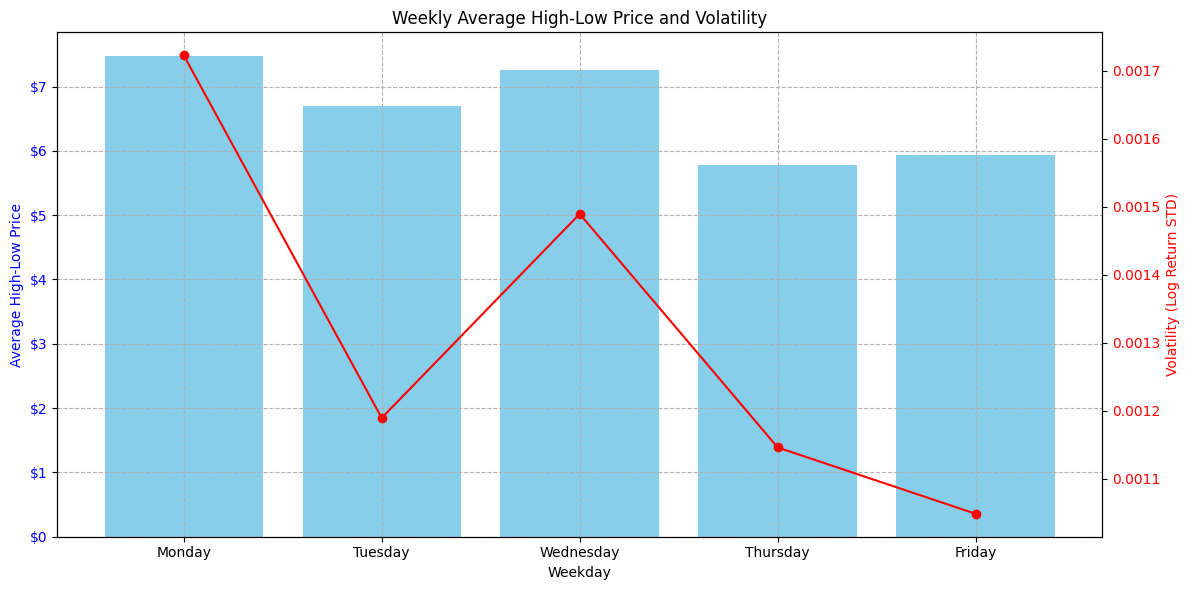

In [46]:
# Creating the visual:
fig, ax1 = plt.subplots(figsize=(12, 6))
# Bar plot: average close prices
ax1.grid(True, linestyle='--', alpha=1.0, zorder=0)
ax1.bar(weekly_summary['Weekday_Name'], weekly_summary['Avg_Daily_High_Low_Diff'], color='skyblue', label='Average High-Low Price')
ax1.set_ylabel('Average High-Low Price', color='blue')
ax1.set_xlabel('Weekday')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))

# Secondary y-axis: volatility line
ax2 = ax1.twinx()
ax2.plot(weekly_summary['Weekday_Name'], weekly_summary['Volatility'], color='red', marker='o', label='Volatility')
ax2.set_ylabel('Volatility (Log Return STD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)    # Disable grid on the line chart axis

# Title and legend
plt.title('Weekly Average High-Low Price and Volatility')
fig.tight_layout()
plt.savefig('weekly_average_high_low_diff_vs_volatility.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
# Creating "Date" and "Hour_of_Day" columns to facilitate grouping by each hour of each day
df['Date'] = df['timestamp'].dt.date
df['Hour_of_Day'] = df['timestamp'].dt.hour

# Calculating the High and Low for each unique hour *within each specific day*
# This gives me the hourly range for every hour of every day in my dataset.
daily_hourly_summary = df.groupby(['Date', 'Hour_of_Day']).agg(
    Hourly_High_Per_Day=('high', 'max'),  # Getting the max "high" price within that hour on that day
    Hourly_Low_Per_Day=('low', 'min')     # Getting the min "low" price within that hour on that day
).reset_index()

# Calculating the hourly high-low difference *for each hour of each day*
daily_hourly_summary['Hourly_High_Low_Diff_Per_Day'] = daily_hourly_summary['Hourly_High_Per_Day'] - daily_hourly_summary['Hourly_Low_Per_Day']

# Finally, calculating the AVERAGE of these hourly differences, grouped by Hour_of_Day (across all days)
# This will give me one average high-low difference for 00:00, one for 01:00, etc.
average_hourly_high_low_diff = daily_hourly_summary.groupby('Hour_of_Day')['Hourly_High_Low_Diff_Per_Day'].mean().reset_index()

# Renaming the column for clarity in the final DataFrame
average_hourly_high_low_diff.rename(
    columns={'Hourly_High_Low_Diff_Per_Day': 'Avg_Hourly_High_Low_Diff'},
    inplace=True
)

In [48]:
# Checking data:
average_hourly_high_low_diff.head()

,Hour_of_Day,Avg_Hourly_High_Low_Diff
0,0,0.548814
1,8,1.594545
2,9,1.479339
3,10,0.885455
4,11,0.945455


In [49]:
# Creating a data set for the Hourly calculation:
df['Date'] = df['timestamp'].dt.date
df['Hour_of_Day'] = df['timestamp'].dt.hour

In [50]:
# Finding the average "Volume":
avg_volume_by_hour = df.groupby('Hour_of_Day')['volume'].mean().reset_index()

In [51]:
# Rounding the number:
avg_volume_by_hour['volume'] = avg_volume_by_hour['volume'].round(2)

In [52]:
# Checking data:
avg_volume_by_hour.head()

,Hour_of_Day,volume
0,0,12496.34
1,8,19150.33
2,9,15164.46
3,10,12375.41
4,11,17246.67


In [53]:
# Exporting data:
avg_volume_by_hour.to_csv('Average_volume_by_Hour.csv', index=False)

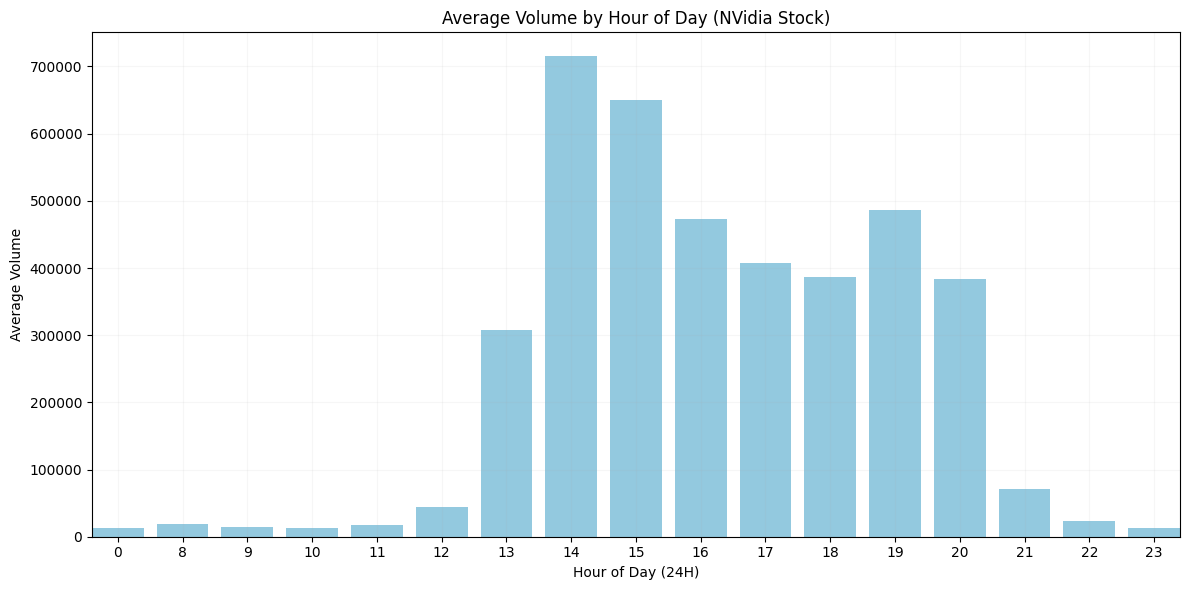

In [54]:
# Creating the visual:
fig, ax = plt.subplots(figsize=(12, 6)) # Get the figure and axes objects explicitly

# Creating the bar plot using seaborn
sns.barplot(x='Hour_of_Day', y='volume', data=avg_volume_by_hour, color='skyblue', ax=ax)

# Adding labels and title
ax.set_title('Average Volume by Hour of Day (NVidia Stock)')
ax.set_xlabel('Hour of Day (24H)')
ax.set_ylabel('Average Volume')

# Ensuring all 24 hours are shown on the x-axis for clarity
ax.set_xticks(range(0, 24))

# More visible grid lines: Increased alpha and changed color to be darker
ax.grid(True, linestyle='-', alpha=0.1, color='darkgray', zorder=0)
# This explicitly tells the axis to auto-adjust its limits to fit the data perfectly.
ax.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()

plt.savefig('average_volume_by_hour.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [55]:
# Creating a new data set to calculate the volatility by hour:
hourly_volatility_df = df.groupby('Hour_of_Day')['Log_Return'].std().reset_index()
hourly_volatility_df.rename(columns={'Log_Return': 'Volatility'}, inplace=True)

In [56]:
# Checking data:
hourly_volatility_df

,Hour_of_Day,Volatility
0,0,0.000369
1,8,0.002593
2,9,0.001577
3,10,0.000834
4,11,0.000832
5,12,0.001217
6,13,0.001808
7,14,0.002142
8,15,0.001620
9,16,0.001226


In [57]:
# Merging the two datasets:
hourly_summary = pd.merge(average_hourly_high_low_diff, hourly_volatility_df, on='Hour_of_Day')

In [58]:
# Limiting to 24H timespan:
hourly_summary = hourly_summary[~hourly_summary['Hour_of_Day'].isin([-1, 24])]
average_hourly_high_low_diff = average_hourly_high_low_diff[~average_hourly_high_low_diff['Hour_of_Day'].isin([-1, 24])]

In [59]:
# Checking data:
hourly_summary

,Hour_of_Day,Avg_Hourly_High_Low_Diff,Volatility
0,0,0.548814,0.000369
1,8,1.594545,0.002593
2,9,1.479339,0.001577
3,10,0.885455,0.000834
4,11,0.945455,0.000832
5,12,1.809174,0.001217
6,13,2.833388,0.001808
7,14,2.990992,0.002142
8,15,2.339008,0.001620
9,16,1.719008,0.001226


In [60]:
# Exporting data:
hourly_summary.to_csv('Hourly_avg_High_Low_price_vs_Volatility.csv',index=False)

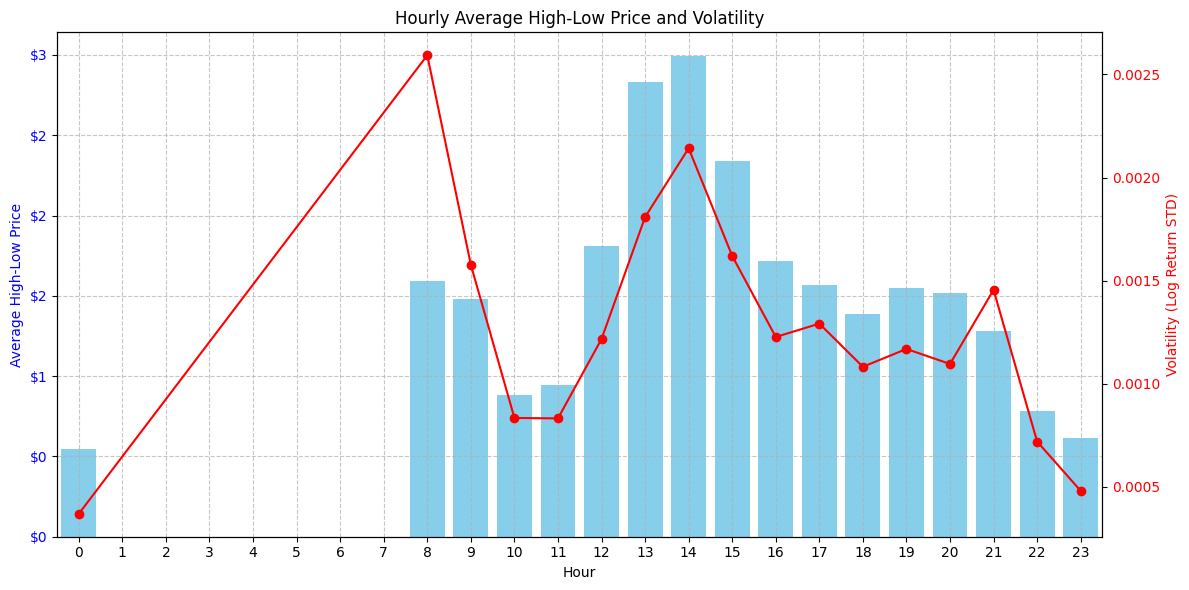

In [61]:
# Creating the visual:

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot: average close prices
ax1.grid(True, linestyle='--', alpha=0.7, zorder=0)
ax1.bar(hourly_summary['Hour_of_Day'], hourly_summary['Avg_Hourly_High_Low_Diff'], color='skyblue', label='Average High-Low Price')
ax1.set_ylabel('Average High-Low Price', color='blue')
ax1.set_xlabel('Hour')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_xlim(-0.5, 23.5)
ax1.set_xticks(range(0, 24))


# Secondary y-axis: volatility line
ax2 = ax1.twinx()
ax2.plot(hourly_summary['Hour_of_Day'], hourly_summary['Volatility'], color='red', marker='o', label='Volatility')
ax2.set_ylabel('Volatility (Log Return STD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)

# Title and legend
plt.title('Hourly Average High-Low Price and Volatility')
fig.tight_layout()
plt.savefig('hourly_average_high_low_diff_prices_vs_volatility.png', dpi=300, bbox_inches='tight')
plt.show()

In [62]:
# Creating an hourly average close price vs volume visualisation:
Avg_Close_vs_Volume_Hourly = df.groupby('Hour_of_Day').agg(
    Avg_Close_Price_Hourly=('close', 'mean'),
    Total_Volume_Hourly=('volume', 'sum')
).reset_index()

all_hours = pd.DataFrame({'Hour_of_Day': range(24)})
Avg_Close_vs_Volume_Hourly = pd.merge(
    all_hours, Avg_Close_vs_Volume_Hourly,
    on='Hour_of_Day', how='left'
).fillna(0)

In [63]:
# Checking data:
Avg_Close_vs_Volume_Hourly.head()

,Hour_of_Day,Avg_Close_Price_Hourly,Total_Volume_Hourly
0,0,134.138398,44062104.0
1,1,0.000000,0.0
2,2,0.000000,0.0
3,3,0.000000,0.0
4,4,0.000000,0.0


In [64]:
# Rounding all price columns to 2 decimal places
Avg_Close_vs_Volume_Hourly['Avg_Close_Price_Hourly'] = Avg_Close_vs_Volume_Hourly['Avg_Close_Price_Hourly'].round(2)

In [65]:
# Checking data:
Avg_Close_vs_Volume_Hourly.head()

,Hour_of_Day,Avg_Close_Price_Hourly,Total_Volume_Hourly
0,0,134.14,44062104.0
1,1,0.00,0.0
2,2,0.00,0.0
3,3,0.00,0.0
4,4,0.00,0.0


In [66]:
# Exporting data:
Avg_Close_vs_Volume_Hourly.to_csv('Hourly_Avg_Close_Price_vs_Volume.csv',index=False)

In [67]:
# Formatting the numbers:
def volume_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'
    elif x >= 1_000:
        return f'{x*1e-3:.0f}K'
    return f'{x:.0f}'

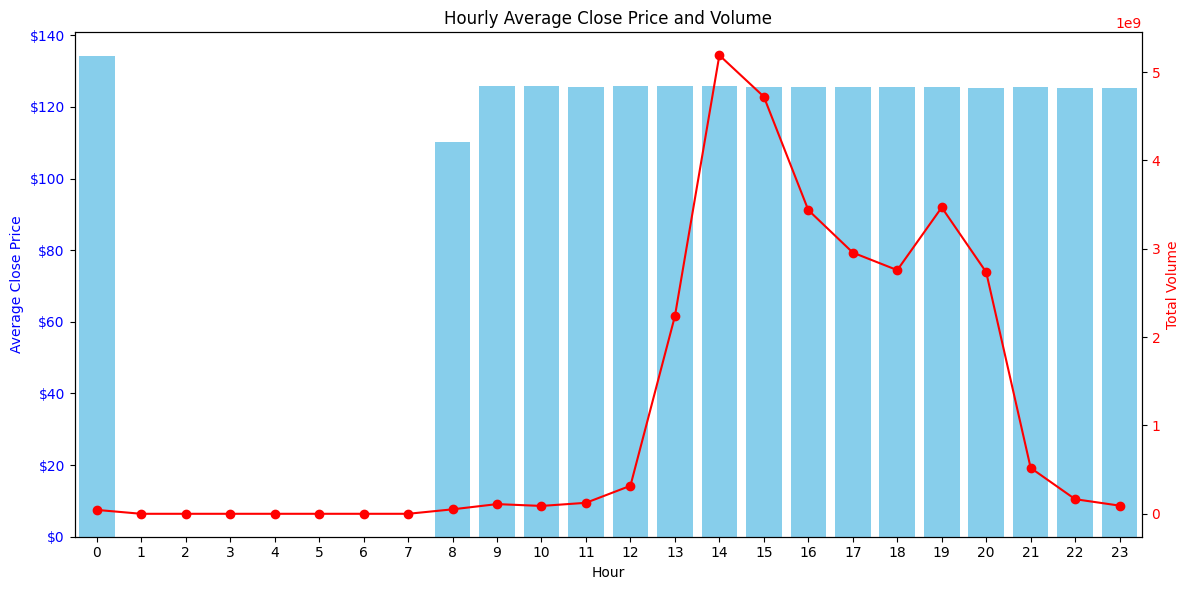

In [68]:
# Creating the visual:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot: average close prices
ax1.bar(Avg_Close_vs_Volume_Hourly['Hour_of_Day'], Avg_Close_vs_Volume_Hourly['Avg_Close_Price_Hourly'], color='skyblue', label='Average Close Price')
ax1.set_ylabel('Average Close Price', color='blue')
ax1.set_xlabel('Hour')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set_xlim(-0.5, 23.5)
ax1.set_xticks(range(0, 24))


# Secondary y-axis: volatility line
ax2 = ax1.twinx()
ax2.plot(Avg_Close_vs_Volume_Hourly['Hour_of_Day'], Avg_Close_vs_Volume_Hourly['Total_Volume_Hourly'], color='red', marker='o', label='Total Volume')
ax2.set_ylabel('Total Volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)

# Title and legend
plt.title('Hourly Average Close Price and Volume')
fig.tight_layout()
plt.savefig('hourly_average_close_prices_vs_volume.png', dpi=300, bbox_inches='tight')
plt.show()

In [69]:
# Creating a timestamp index:
hourly_df=df.set_index('timestamp')

In [70]:
# Checking data:
hourly_df.head()

,open,high,low,close,volume,Log_Return,Year_Month,Weekday_Name,Date,Hour_of_Day
timestamp,,,,,,,,,,
2024-11-13 09:00:00,148.65,148.95,148.00,148.50,14930,NaN,2024-11,Wednesday,2024-11-13,9
2024-11-13 09:01:00,148.47,148.57,148.40,148.53,7825,0.000202,2024-11,Wednesday,2024-11-13,9
2024-11-13 09:02:00,148.55,148.56,148.41,148.48,11155,-0.000337,2024-11,Wednesday,2024-11-13,9
2024-11-13 09:03:00,148.49,148.49,148.25,148.27,15815,-0.001415,2024-11,Wednesday,2024-11-13,9
2024-11-13 09:04:00,148.23,148.26,148.10,148.15,12117,-0.000810,2024-11,Wednesday,2024-11-13,9


In [71]:
# Exporting data:
hourly_df.to_csv('Candlestick_vis_of_last_day.csv',index=False)

In [72]:
# Creating a candlestick visualisation:
hourly_df = hourly_df.resample('h').agg({
    'open': 'first',   # Open price of the hour is the open of the first minute
    'high': 'max',     # High price of the hour is the max high of all minutes
    'low': 'min',      # Low price of the hour is the min low of all minutes
    'close': 'last',   # Close price of the hour is the close of the last minute
    'volume': 'sum'    # Total volume for the hour is the sum of minute volumes
})

In [73]:
# Removing missing values:
hourly_df.dropna(inplace=True)

In [74]:
# Taking the necessary columns:
hourly_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [75]:
# Taking only 2025-05-09 from the dataset:
plot_date = pd.to_datetime('2025-05-09').date()

In [76]:
# Filtering hourly_df to include only the rows where the index's date matches plot_date:
plot_df = hourly_df[hourly_df.index.date == plot_date]

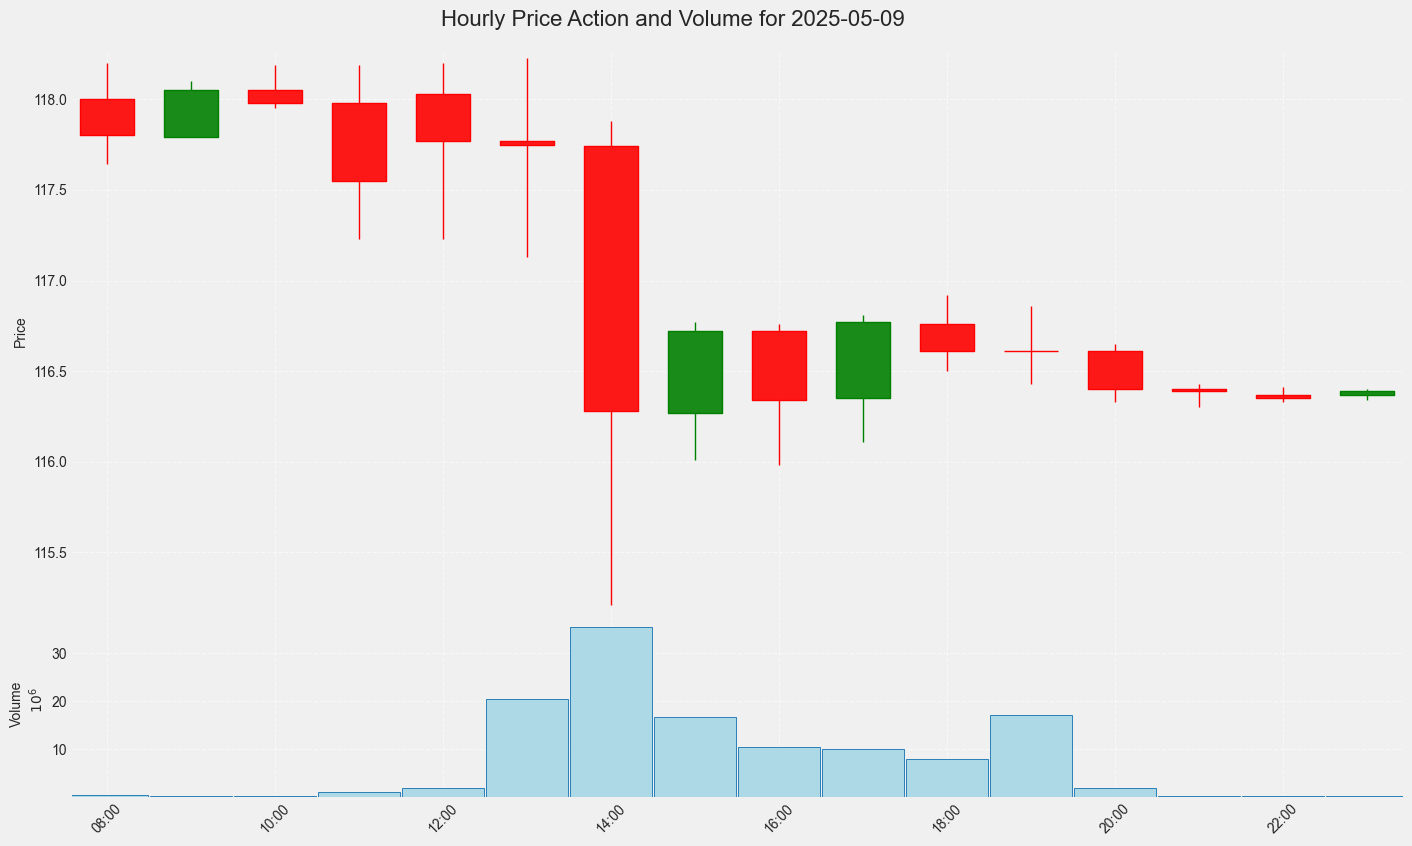

In [77]:
# Creating the visual:
mc = mpf.make_marketcolors(up='green', down='red', inherit=True)
mc['volume'] = {'up': 'lightblue', 'down': 'lightblue'}
s = mpf.make_mpf_style(base_mpl_style="seaborn-v0_8-darkgrid", marketcolors=mc,
                       figcolor='#f0f0f0', facecolor='#f0f0f0')

fig, axes = mpf.plot(plot_df,
                     type='candle',
                     style=s,
                     volume=True,
                     main_panel=0,
                     volume_panel=1,
                     panel_ratios=(3,1),
                     figscale=1.5,
                     figratio=(16,9),
                     ylabel='Price',
                     ylabel_lower='Volume',
                     tight_layout=True,
                     returnfig=True,
                     warn_too_much_data=len(plot_df) + 1
                    )
fig.suptitle(f'Hourly Price Action and Volume for {plot_date}', fontsize=16, y=1.02)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.savefig(f'hourly_candlestick_volume_{plot_date}.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

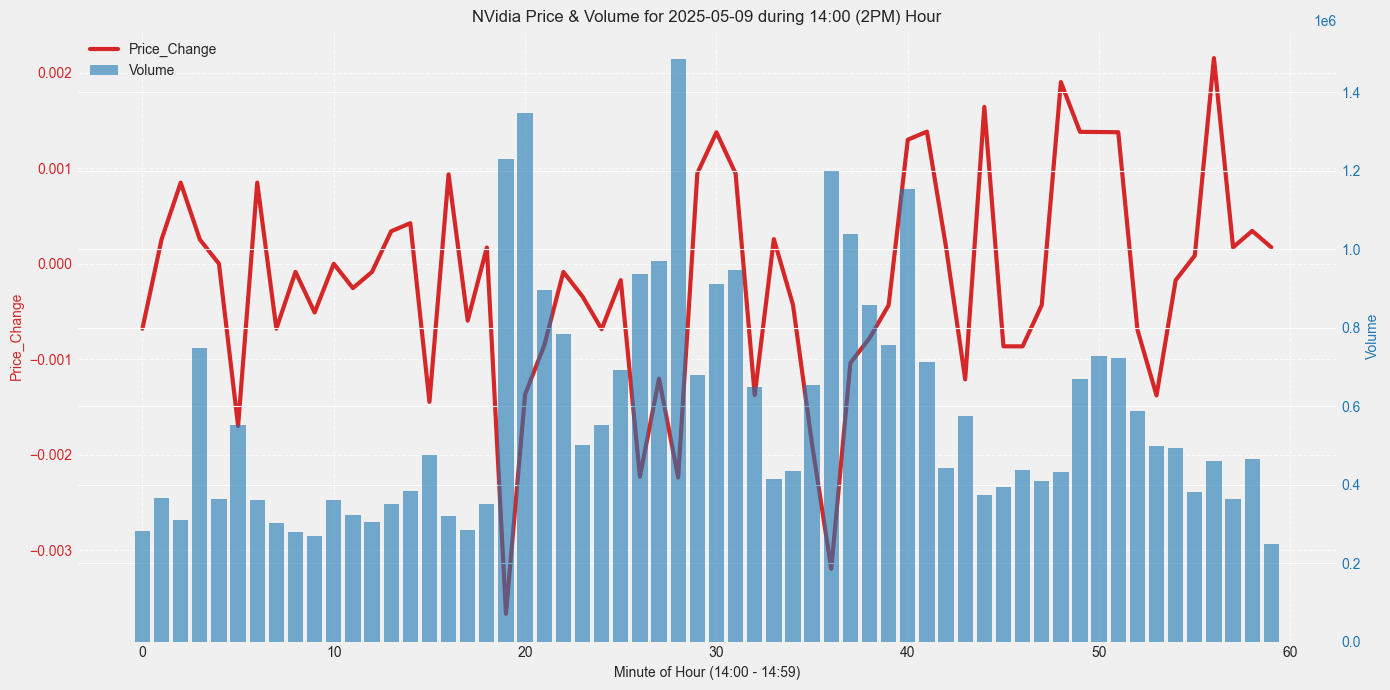

In [78]:
# Creating a visual for the price change vs the volume:
plot_date = pd.to_datetime('2025-05-09').date()
most_active_hour = 14 # 2 PM


# Filtering the DataFrame for the specific date AND hour
filtered_data_for_hour = df[(df['Date'] == plot_date) &
                            (df['Hour_of_Day'] == most_active_hour)].copy()

if not filtered_data_for_hour.empty:
    # Creating a figure and a set of subplots
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color_price = 'tab:red'
    ax1.set_xlabel(f'Minute of Hour ({most_active_hour}:00 - {most_active_hour}:59)')
    ax1.set_ylabel('Price_Change', color=color_price)
    line_plot, = ax1.plot(filtered_data_for_hour['timestamp'].dt.minute, filtered_data_for_hour['Log_Return'],
                          color=color_price, label='Price_Change', zorder=2, linewidth=3)
    ax1.tick_params(axis='y', labelcolor=color_price)
    ax1.grid(True, linestyle='--', alpha=0.7, zorder=0)

    ax2 = ax1.twinx()
    color_volume = 'tab:blue'
    ax2.set_ylabel('Volume', color=color_volume)
    bar_plot = ax2.bar(filtered_data_for_hour['timestamp'].dt.minute, filtered_data_for_hour['volume'],
                       color=color_volume, alpha=0.6, label='Volume', zorder=1)
    ax2.tick_params(axis='y', labelcolor=color_volume)

    # --- Titles and Legends ---
    plt.title(f'NVidia Price & Volume for {plot_date} during {most_active_hour}:00 (2PM) Hour')

    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    ax2.legend(lines + bars, labels + bar_labels, loc='upper left')

    # --- Final Layout Adjustments ---
    plt.tight_layout()
    plt.savefig('nvidia_price_volume_2PM_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print(f"No data found for {plot_date} at hour {most_active_hour}.")